# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.4338 - acc: 0.1007 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 4s 87us/step - loss: 2.3042 - acc: 0.2158 - val_loss: 1.9823 - val_acc: 0.2889
Epoch 2/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8862 - acc: 0.3191 - val_loss: 1.8166 - val_acc: 0.3529
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7876 - acc: 0.3563 - val_loss: 1.8565 - val_acc: 0.3407
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7215 - acc: 0.3802 - val_loss: 1.8149 - val_acc: 0.3526
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6591 - acc: 0.4070 - val_loss: 1.7246 - val_acc: 0.3733
Epoch 6/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.6109 - acc: 0.4239 - val_loss: 1.7890 - val_acc: 0.3690
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5741 - acc: 0.4376 - val_loss: 1.8374 - val_acc: 0.3593
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 4s 88us/step - loss: 1.7929 - acc: 0.3618 - val_loss: 1.7573 - val_acc: 0.3778
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7138 - acc: 0.3938 - val_loss: 1.7421 - val_acc: 0.3716
Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6537 - acc: 0.4165 - val_loss: 1.7957 - val_acc: 0.3694
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6114 - acc: 0.4300 - val_loss: 1.6240 - val_acc: 0.4232
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5787 - acc: 0.4430 - val_loss: 1.6742 - val_acc: 0.3992
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5489 - acc: 0.4548 - val_loss: 1.6075 - val_acc: 0.4319
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5201 - acc: 0.4659 - val_loss: 1.5823 - val_acc: 0.4366
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8370 - acc: 0.3625 - val_loss: 1.8265 - val_acc: 0.3662
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8027 - acc: 0.3734 - val_loss: 1.7948 - val_acc: 0.3772
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7746 - acc: 0.3832 - val_loss: 1.7699 - val_acc: 0.3789
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7510 - acc: 0.3918 - val_loss: 1.7560 - val_acc: 0.3732
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7303 - acc: 0.3995 - val_loss: 1.7251 - val_acc: 0.3994
Epoch 9/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7103 - acc: 0.4066 - val_loss: 1.7157 - val_acc: 0.3987
Epoch 10/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6935 - acc: 0.4138 - val_loss: 1.6945 - val_acc: 0.4077
Epoch 11/50
50000/50000 [===============

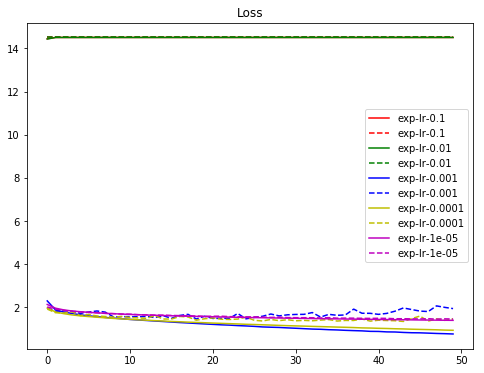

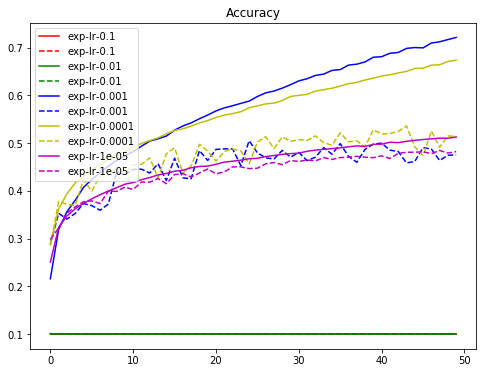

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()